<a href="https://colab.research.google.com/github/aadi0004/advanced-python/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('loan.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In [ ]:
df.shape

(61, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [ ]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [ ]:
# Summary statistics for categorical columns
cat_summary = df.describe(include=['object'])

cat_summary


,gender,occupation,education_level,marital_status,loan_status
count,61,61,61,61,61
unique,2,38,5,2,2
top,Male,Engineer,Bachelor's,Married,Approved
freq,31,5,23,37,45


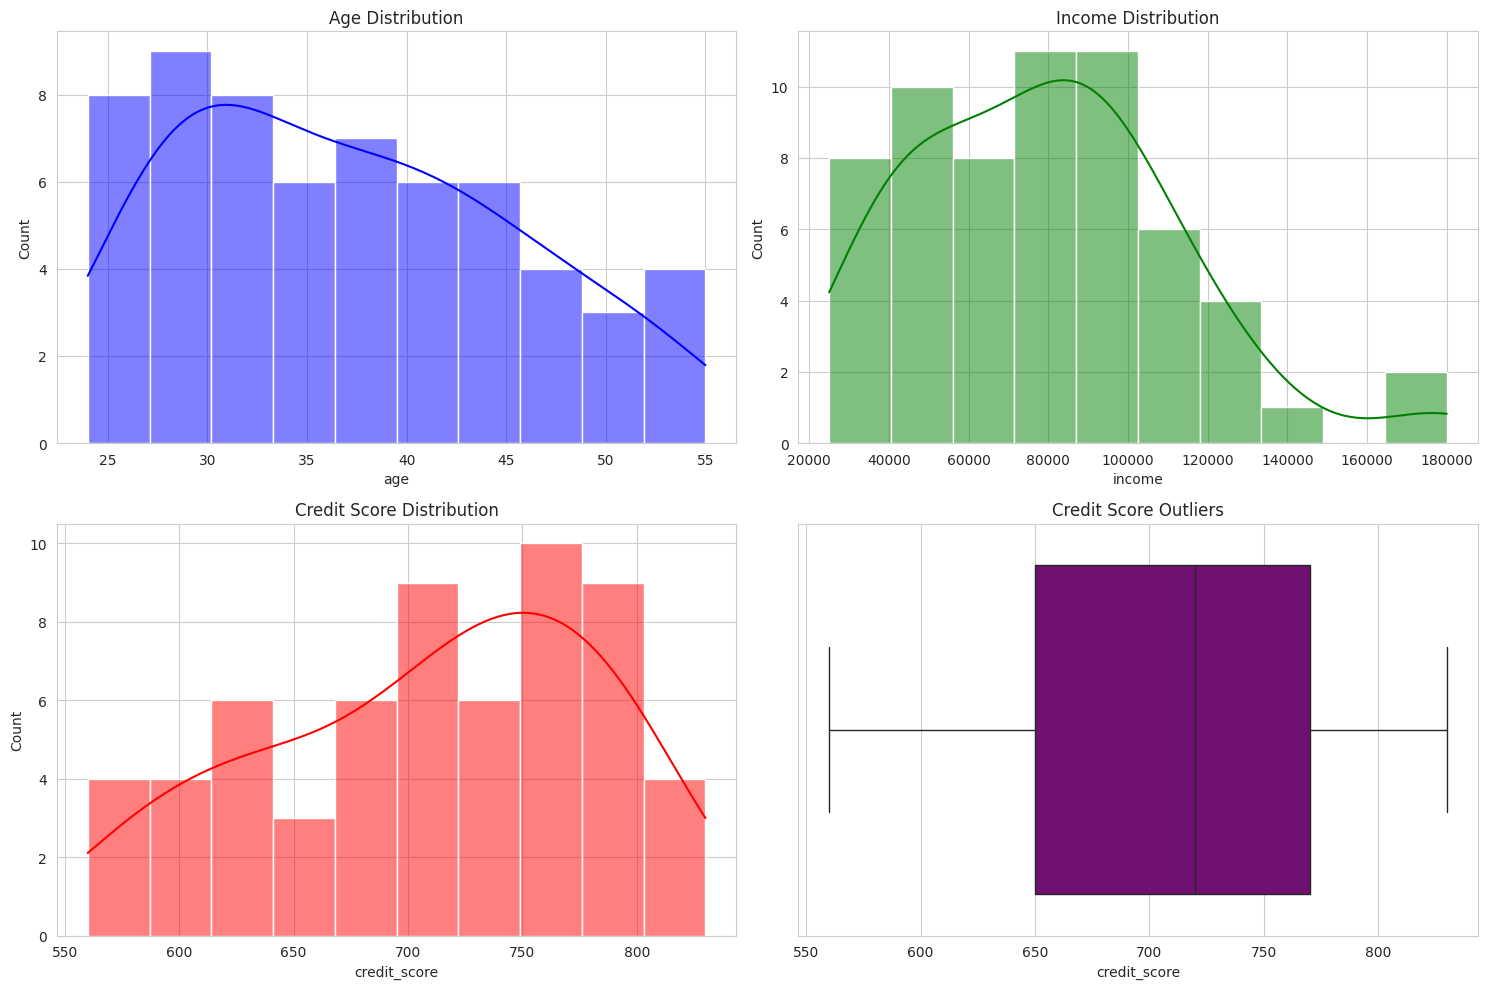

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Figure size
plt.figure(figsize=(15, 10))

# Histograms for numerical features
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['income'], bins=10, kde=True, color='green')
plt.title('Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['credit_score'], bins=10, kde=True, color='red')
plt.title('Credit Score Distribution')

# Boxplot for detecting outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=df['credit_score'], color='purple')
plt.title('Credit Score Outliers')

plt.tight_layout()
plt.show()


<ipython-input-10-a3bf44bd68cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='Set2')
<ipython-input-10-a3bf44bd68cb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['education_level'], palette='Set3')
<ipython-input-10-a3bf44bd68cb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['loan_status'], palette='Set1')


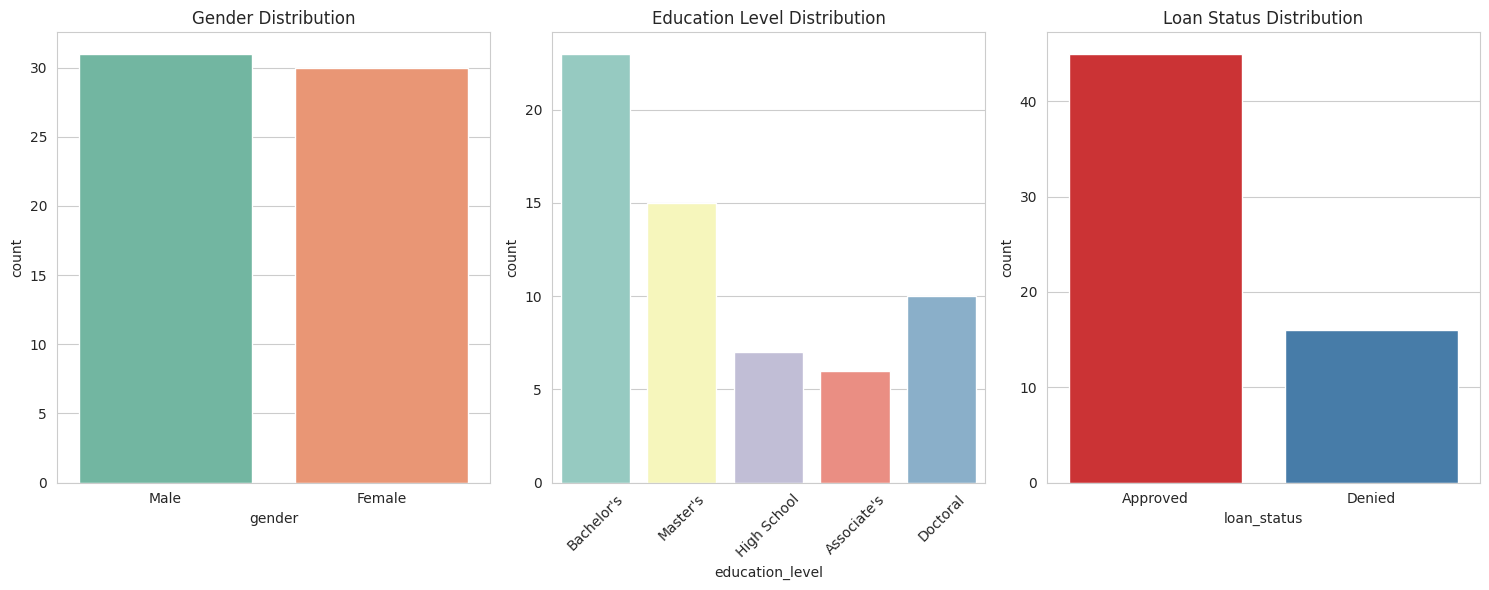

In [ ]:
# Count plots for categorical variables
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.countplot(x=df['gender'], palette='Set2')
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x=df['education_level'], palette='Set3')
plt.xticks(rotation=45)
plt.title('Education Level Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x=df['loan_status'], palette='Set1')
plt.title('Loan Status Distribution')

plt.tight_layout()
plt.show()


<ipython-input-11-03fb937970aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['income'], palette='coolwarm')
<ipython-input-11-03fb937970aa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['credit_score'], palette='coolwarm')


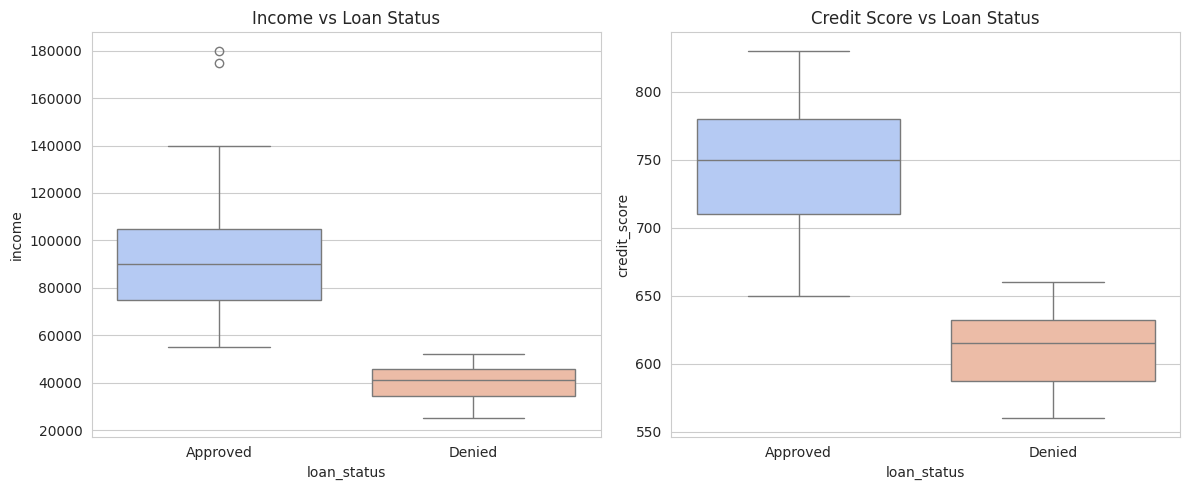

In [ ]:
# Boxplot: Income vs Loan Status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_status'], y=df['income'], palette='coolwarm')
plt.title('Income vs Loan Status')

# Boxplot: Credit Score vs Loan Status
plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_status'], y=df['credit_score'], palette='coolwarm')
plt.title('Credit Score vs Loan Status')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode categorical variables
label_encoders = {}
categorical_cols = ['gender', 'occupation', 'education_level', 'marital_status', 'loan_status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Standardize numerical features
scaler = StandardScaler()
X[['age', 'income', 'credit_score']] = scaler.fit_transform(X[['age', 'income', 'credit_score']])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy
